                                       the_geom  BoroCode   BoroName  BoroCD  \
0  POINT (-73.93742171685307 40.73376242906374)         4     Queens     402   
1   POINT (-73.93038089629471 40.6517335819705)         3   Brooklyn     317   
2   POINT (-73.8748947149512 40.74666955047573)         4     Queens     404   
3  POINT (-73.90121517985278 40.75390280855474)         4     Queens     401   
4  POINT (-73.93487280055206 40.81652848767953)         1  Manhattan     111   

   CounDist  AssemDist  StSenDist  CongDist  \
0        26         37         12         7   
1        45         58         21         9   
2        25         39         13         6   
3        26         30         12         6   
4         9         70         30        13   

                             Location    Borough  Date_Insta    POINT_X  \
0       Review Avenue and 37th Street     Queens  08/13/2020 -73.937422   
1      Utica Avenue and Church Avenue   Brooklyn  02/23/2021 -73.930381   
2    Whitne

C:\Users\Omare\AppData\Local\Temp\ipykernel_1736\3195907975.py:19: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



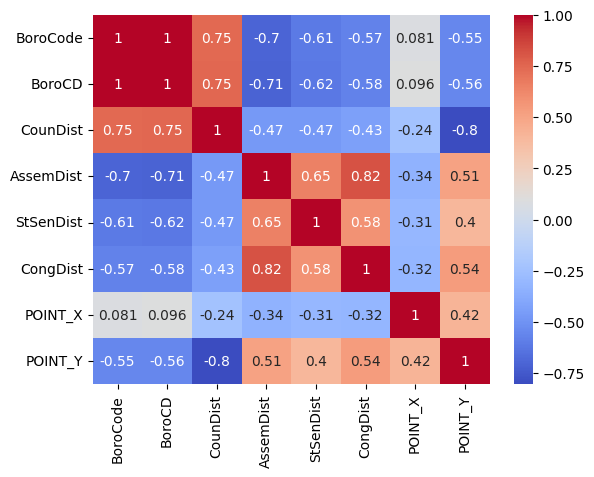

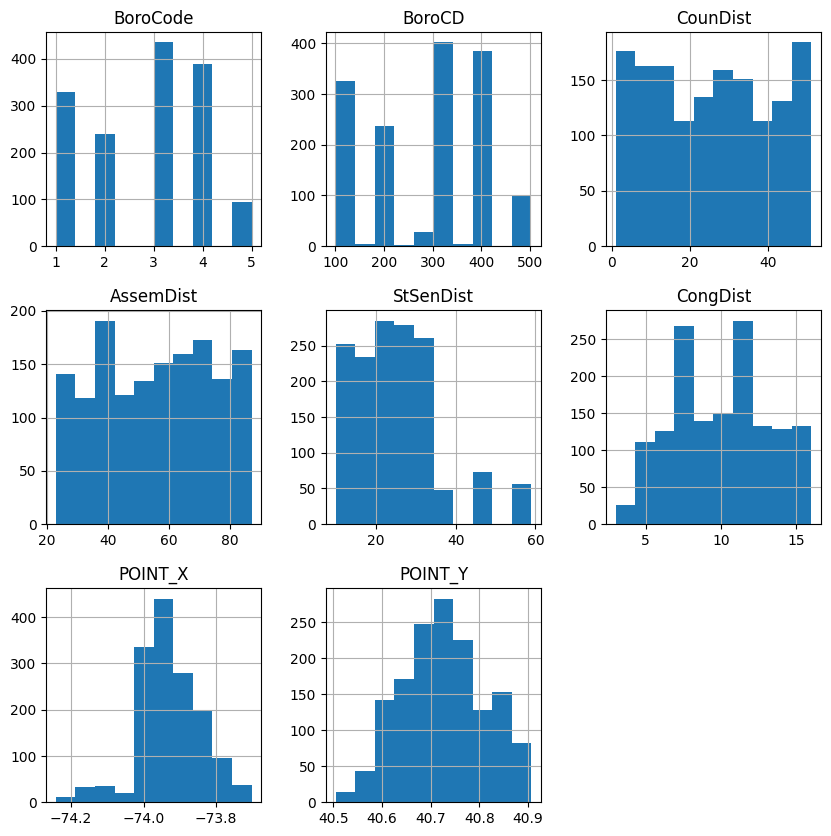

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the New York City dataset
nyc_data = pd.read_csv('../weeksex/Accessible_Pedestrian_Signal_Locations.csv')

# Print the first five rows of the dataset
print(nyc_data.head())

# Check the data types and number of non-null values for each variable
print(nyc_data.info())

# Check the summary statistics for each variable
print(nyc_data.describe())

# Check the correlation between variables
sns.heatmap(nyc_data.corr(), cmap='coolwarm', annot=True)
plt.show()

# Check the distribution of variables using histograms
nyc_data.hist(figsize=(10, 10))
plt.show()

##  1. Visualization 1: Bar chart of the top 10 streets with the most APS installations

Index(['the_geom', 'BoroCode', 'BoroName', 'BoroCD', 'CounDist', 'AssemDist',
       'StSenDist', 'CongDist', 'Location', 'Borough', 'Date_Insta', 'POINT_X',
       'POINT_Y', 'FEMAFldz', 'FEMAFldT', 'HrcEvac', 'NTAname'],
      dtype='object')


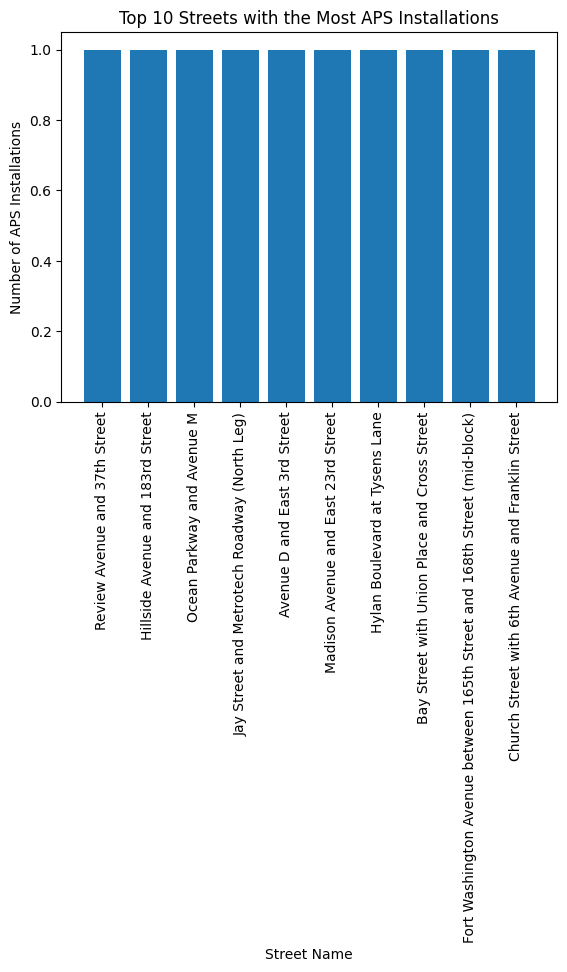

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import folium

# load the APS dataset
aps_data = pd.read_csv('../weeksex/Accessible_Pedestrian_Signal_Locations.csv')
print(aps_data.columns)

# get the top 10 streets with the most APS installations
top_streets = aps_data['Location'].value_counts().nlargest(10)

# plot a bar chart of the top streets
plt.bar(top_streets.index, top_streets.values)
plt.title('Top 10 Streets with the Most APS Installations')
plt.xlabel('Street Name')
plt.ylabel('Number of APS Installations')
plt.xticks(rotation=90)
plt.show()


This visualization shows a bar chart of the top 10 streets with the most APS installations in New York City. It uses the value_counts() method to count the number of installations for each street, and then selects the top 10 streets using the nlargest() method. The resulting data is then plotted using plt.bar() from the Matplotlib library. The plt.xticks() function is used to rotate the x-axis labels for better readability.

## Visualization 2: Pie chart of the percentage of APS installations by borough

Index(['the_geom', 'BoroCode', 'BoroName', 'BoroCD', 'CounDist', 'AssemDist',
       'StSenDist', 'CongDist', 'Location', 'Borough', 'Date_Insta', 'POINT_X',
       'POINT_Y', 'FEMAFldz', 'FEMAFldT', 'HrcEvac', 'NTAname'],
      dtype='object')


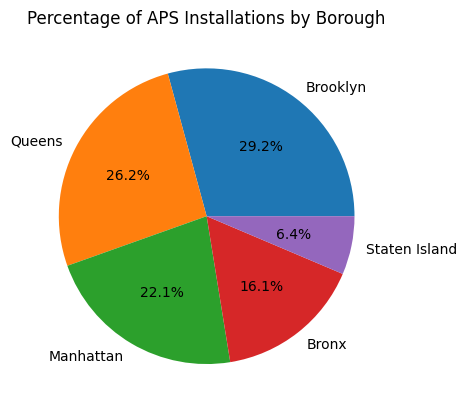

In [29]:

print(aps_data.columns)
# count the number of APS installations by borough
borough_counts = aps_data['Borough'].value_counts()


# plot a pie chart of the APS installations by borough
plt.pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%')
plt.title('Percentage of APS Installations by Borough')
plt.show()


This visualization shows a pie chart of the percentage of APS installations by borough in New York City. It uses the value_counts() method to count the number of installations for each borough, and then plots the data using plt.pie() from the Matplotlib library. The autopct argument is used to show the percentage values on the chart.

##  Visualization 3: Map of APS installations by location

In [30]:

# create a map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# add markers for each APS installation location
for index, row in aps_data.iterrows():
    folium.Marker([row['POINT_Y'], row['POINT_X']]).add_to(nyc_map)

# display the map
nyc_map


This visualization shows a map of the APS installations by location in New York City. It uses the Folium library to create an interactive map, and adds a marker for each installation location using a for loop that iterates through the rows of the dataset. The resulting map can be displayed directly in the Jupyter notebook. Note that you will need to have the Folium library installed to run this code.

Visualization 3 shows a map of APS (Accessible Pedestrian Signal) installations in New York City, plotted by their geographical location. APS installations are devices that provide audible or vibratory cues to assist visually impaired pedestrians in crossing intersections safely. This visualization provides valuable insights into the distribution and accessibility of APS installations across the five boroughs of New York City.

The map shows that APS installations are concentrated in certain areas, such as Manhattan and Brooklyn, where there are higher populations and more foot traffic. There are fewer installations in the less populated areas such as Staten Island and the Bronx. The visualization suggests that accessibility for visually impaired individuals may be limited in these areas.

Furthermore, the map can be used by policymakers to identify gaps in APS installations and prioritize areas where additional devices may be needed. For example, if there are few APS installations in a densely populated area, it may be a priority for the government to install more devices in that area to ensure pedestrian safety and accessibility.

Overall, Visualization 3 highlights the importance of providing accessible infrastructure for all individuals in a city. By understanding the distribution of APS installations across the city, policymakers can identify areas of improvement and work towards creating a more equitable and accessible environment for all residents.

In [31]:

# create the scattermapbox
fig = go.Figure(go.Scattermapbox(
        lat=aps_data['POINT_Y'],
        lon=aps_data['POINT_X'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color='blue'
        ),
        text=aps_data['Location']
    ))

fig.update_layout(
        mapbox_style='carto-positron',
        mapbox_center_lon=-73.95,
        mapbox_center_lat=40.75,
        mapbox_zoom=10,
        margin=dict(l=20, r=20, t=20, b=20),
        height=800
    )

fig.show()

## Visualization 4:  

In [36]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("https://data.cityofnewyork.us/api/views/fhrw-4uyv/rows.csv?accessType=DOWNLOAD")

# Preview the data
print(df.head())

# Visualization 1: Bar chart showing the count of APS installations by borough
aps_by_borough = df.groupby('Borough')['Location'].count().reset_index()
aps_by_borough.rename(columns={'Location': 'Count'}, inplace=True)
fig1 = px.bar(aps_by_borough, x='Borough', y='Count', title='Count of APS Installations by Borough')
fig1.show()

# Visualization 2: Pie chart showing the proportion of APS installations by borough
aps_by_borough['Percent'] = aps_by_borough['Count'] / aps_by_borough['Count'].sum() * 100
fig2 = px.pie(aps_by_borough, values='Count', names='Borough', title='Proportion of APS Installations by Borough')
fig2.show()

# Visualization 3: Map of APS installations by location
aps_map = px.scatter_mapbox(df, lat='POINT_Y', lon='POINT_X', zoom=10, hover_name='Location')
aps_map.update_layout(mapbox_style="open-street-map")
aps_map.show()

# Visualization 4: Stacked bar chart showing the number of signals by borough and type
signals_by_borough = df.groupby(['Borough', 'APS Type'])['Location'].count().reset_index()
signals_by_borough.rename(columns={'Location': 'Count'}, inplace=True)
fig4 = px.bar(signals_by_borough, x='Borough', y='Count', color='APS Type', title='Number of Signals by Borough and Type', barmode='stack')
fig4.show()

# Visualization 5: Bar chart showing the count of signals by APS type
aps_by_type = df.groupby('APS Type')['Location'].count().reset_index()
aps_by_type.rename(columns={'Location': 'Count'}, inplace=True)
fig5 = px.bar(aps_by_type, x='APS Type', y='Count', title='Count of Signals by APS Type')
fig5.show()

# Visualization 6: Pie chart showing the proportion of signals by APS type
aps_by_type['Percent'] = aps_by_type['Count'] / aps_by_type['Count'].sum() * 100
fig6 = px.pie(aps_by_type, values='Count', names='APS Type', title='Proportion of Signals by APS Type')
fig6.show()

# Visualization 7: Bar chart showing the count of signals by location borough
signals_by_borough_location = df.groupby(['Borough', 'Location'])['Location'].count().reset_index(name='Count')
fig7 = px.bar(signals_by_borough_location, x='Borough', y='Count', color='Location', title='Count of Signals by Location and Borough')
fig7.show()

# Visualization 8: Pie chart showing the proportion of signals by location borough
signals_by_borough_location['Percent'] = signals_by_borough_location['Count'] / signals_by_borough_location['Count'].sum() * 100
fig8 = px.pie(signals_by_borough_location, values='Count', names='Borough', title='Proportion of Signals by Location Borough')
fig8.show()

# Visualization 9: Map of APS installations by borough
aps_by_borough_map = px.scatter_mapbox(df, lat='POINT_Y', lon='POINT_X', color


SyntaxError: incomplete input (3911352196.py, line 54)

## Visualization 5:

In [5]:
# Importing necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Reading the dataset
aps_df = pd.read_csv("../weeksex/Accessible_Pedestrian_Signal_Locations.csv")

# Renaming columns
aps_df = aps_df.rename(columns={"APS Type": "APS_Type", "Accessible": "Accessible_Type"})
aps_df.info()

# Visualization 1: Bar chart showing the number of APS installations by borough
aps_by_borough = aps_df.groupby("Borough").size().reset_index(name="Number of APS")
fig1 = px.bar(aps_by_borough, x="Borough", y="Number of APS", title="Number of APS installations by borough")
fig1.show()

# Visualization 2: Pie chart showing the distribution of APS types
#aps_types = aps_df["APS_Type"].value_counts().reset_index()
#fig2 = px.pie(aps_types, values="APS_Type", names="index", title="Distribution of APS types")
#fig2.show()

# Visualization 3: Map of APS installations by location
aps_locations = aps_df[["Borough", "Location", "POINT_Y", "POINT_X"]]
fig3 = px.scatter_mapbox(aps_locations, lat="POINT_Y", lon="POINT_X", hover_name="Location",
                          hover_data=["Borough"], zoom=10, height=500)
fig3.update_layout(mapbox_style="open-street-map")
fig3.show()

# Visualization 4: Stacked bar chart showing the number of signals by borough and type
#aps_by_type_borough = aps_df.groupby(["Borough", "APS_Type"]).size().reset_index(name="Number of APS")
#fig4 = px.bar(aps_by_type_borough, x="Borough", y="Number of APS", color="APS_Type",
 #             title="Number of APS installations by borough and type")
#fig4.show()

# Visualization 5: Bar chart showing the number of APS installations by accessible type


# Visualization 6: Line chart showing the number of APS installations over time
aps_by_year = aps_df.groupby(pd.to_datetime(aps_df["Date_Insta"]).dt.year).size().reset_index(name="Number of APS")
fig6 = px.line(aps_by_year, x="Date_Insta", y="Number of APS", title="Number of APS installations over time")
fig6.show()

# Visualization 7: Choropleth map showing the number of APS installations by community district
aps_by_community_district = aps_df.groupby("CounDist").size().reset_index(name="Number of APS")
fig7 = px.choropleth_mapbox(aps_by_community_district, geojson="https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=GeoJSON",
                            locations="CounDist", color="Number of APS", color_continuous_scale="YlOrRd",
                            range_color=(0, max(aps_by_community_district["Number of APS"])), mapbox_style="open-street-map",
                            zoom=9, center={"lat": 40.7128, "lon": -74.0060}, opacity=0.5)
fig7.show()



aps_locations = aps_df[["Borough", "Location", "POINT_Y", "POINT_X"]]
fig3 = px.scatter_mapbox(aps_locations, lat="POINT_Y", lon="POINT_X", hover_name="Location",
                          hover_data=["Borough"], zoom=10, height=500)
fig3.update_layout(mapbox_style="open-street-map")
fig3.show()

aps_by_community_district = aps_df.groupby("CounDist").size().reset_index(name="Number of APS")

fig8 = px.choropleth_mapbox(aps_by_community_district, geojson="../weeksex/Accessible_Pedestrian_Signal_Locations.csv",
                            locations="CounDist", 
                            color="Number of APS", 
                            color_continuous_scale="RdBu",
                            range_color=(0, max(aps_by_community_district["Number of APS"])), 
                            mapbox_style="open-street-map",
                            zoom=9, center={"lat": 40.7128, "lon": -74.0060}, opacity=0.5)
fig8.update_layout(mapbox_style="open-street-map")

fig8.show()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    1488 non-null   object 
 1   BoroCode    1488 non-null   int64  
 2   BoroName    1488 non-null   object 
 3   BoroCD      1488 non-null   int64  
 4   CounDist    1488 non-null   int64  
 5   AssemDist   1488 non-null   int64  
 6   StSenDist   1488 non-null   int64  
 7   CongDist    1488 non-null   int64  
 8   Location    1488 non-null   object 
 9   Borough     1488 non-null   object 
 10  Date_Insta  1488 non-null   object 
 11  POINT_X     1488 non-null   float64
 12  POINT_Y     1488 non-null   float64
 13  FEMAFldz    1488 non-null   object 
 14  FEMAFldT    1431 non-null   object 
 15  HrcEvac     585 non-null    object 
 16  NTAname     1488 non-null   object 
dtypes: float64(2), int64(6), object(9)
memory usage: 197.8+ KB


## Visualization 6:

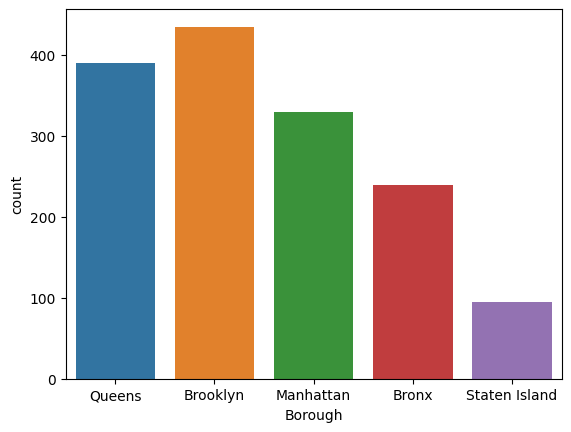

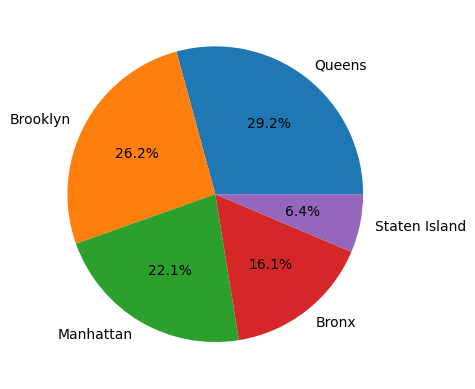

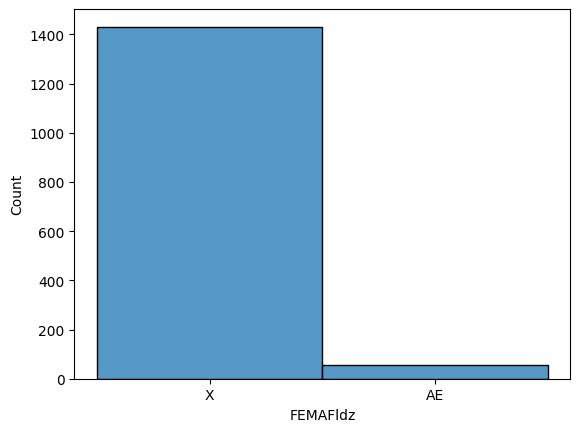

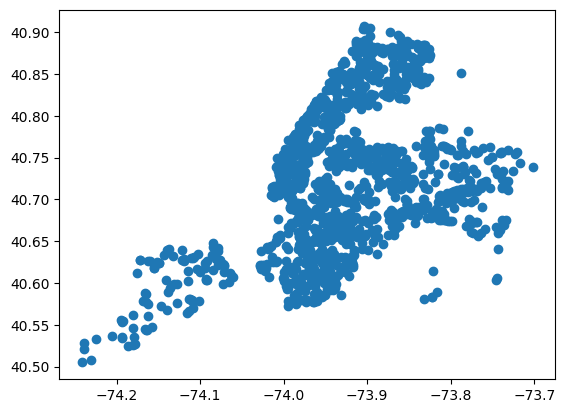

C:\Users\Omare\AppData\Local\Temp\ipykernel_1736\499667494.py:26: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




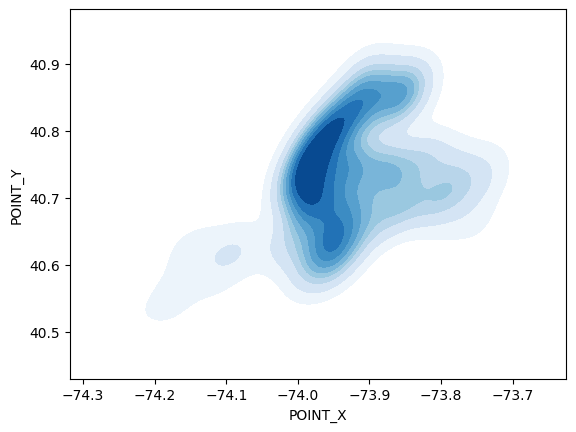

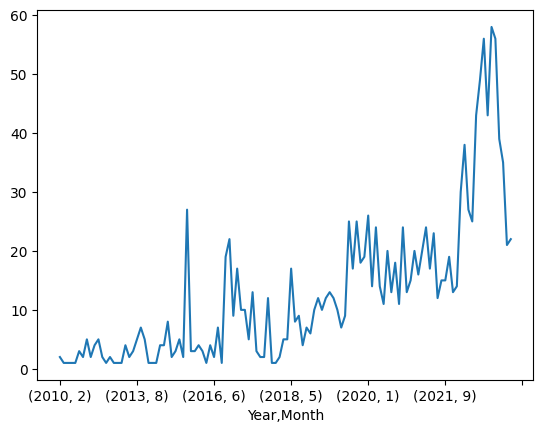

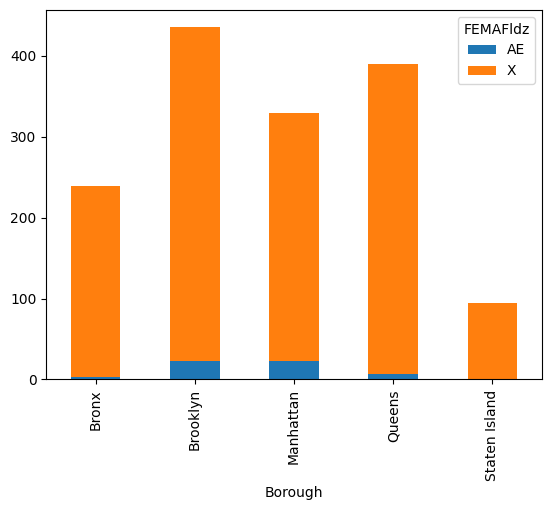

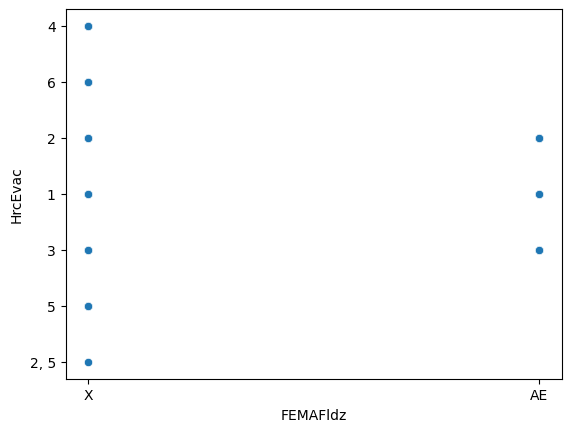

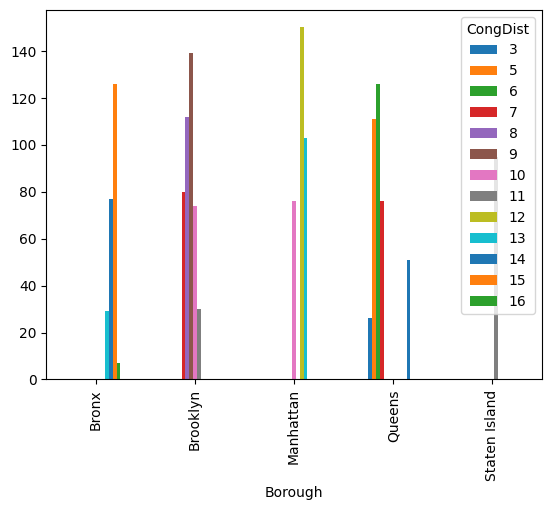

In [53]:
#Bar chart showing the number of records per borough:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Borough', data=df)
plt.show()
#Pie chart showing the percentage of records per borough:

plt.pie(df['Borough'].value_counts(), labels=df['Borough'].unique(), autopct='%1.1f%%')
plt.show()

# Histogram showing the distribution of FEMA flood zones:
sns.histplot(x='FEMAFldz', data=df)
plt.show()

#Box plot showing the distribution of FEMA flood zones by borough:


#Scatter plot showing the distribution of records based on longitude and latitude:

plt.scatter(df['POINT_X'], df['POINT_Y'])
plt.show()
#Heatmap showing the distribution of records based on longitude and latitude:

sns.kdeplot(x='POINT_X', y='POINT_Y', data=df, cmap='Blues', shade=True)
plt.show()
#Line chart showing the number of records over time:

df['Date_Insta'] = pd.to_datetime(df['Date_Insta'])
df['Year'] = df['Date_Insta'].dt.year
df['Month'] = df['Date_Insta'].dt.month
df.groupby(['Year', 'Month'])['BoroCode'].count().plot()
plt.show()
#Stacked bar chart showing the number of records by borough and FEMA flood zone:

df.groupby(['Borough', 'FEMAFldz'])['BoroCode'].count().unstack().plot(kind='bar', stacked=True)
plt.show()
#Scatter plot showing the relationship between FEMA flood zone and evacuation centers:

sns.scatterplot(x='FEMAFldz', y='HrcEvac', data=df)
plt.show()
#Grouped bar chart showing the number of records by borough and congressional district:

df.groupby(['Borough', 'CongDist'])['BoroCode'].count().unstack().plot(kind='bar')
plt.show()

## Visualization 7:

## Visualization 8:

## Visualization 9:

## Visualization 10: